# Market Share for each movie genre compared to % change in US GDP from year to year

Does the % change in GDP of the US lead to a change in market share for certain genres of movies?

In [2]:
import sys
#import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.special import comb
from scipy.stats import spearmanr

data = pd.read_csv ('data.csv', index_col=0)


The plot below shows the GDP Growth Rate in the US from 1995 to 2018. It shows the general trend of the economy over that time period. If a value is negative, that means that the percent change in GDP from the previous year to that year was negative and the GDP did not grow, it declined.

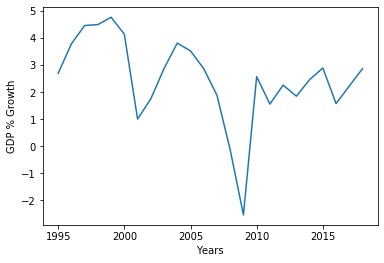

In [3]:
gdp = data["GDP % Growth"]
g= np.zeros(24)
count = 0
for x in gdp:
    g[count] = x
    count+=1

plt.plot(range(1995,2019),g)
plt.xlabel('Years')
plt.ylabel('GDP % Growth')
plt.show()

## Visual Representation of the relationship between % change in GDP and each movie genre using scatter plots

Each of the following graph shows a scatter plot of GDP and each movie genre.

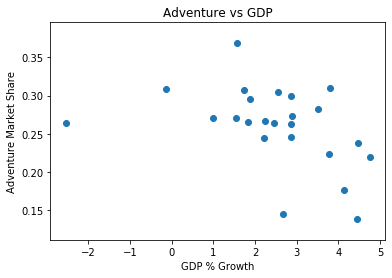

In [4]:
adventure = data['Adventure Market Share']
ad = np.zeros(24)
count = 0
for x in adventure:
    ad[count] = x
    count+=1
plt.scatter(g, ad)
plt.title('Adventure vs GDP')
plt.ylabel('Adventure Market Share')
plt.xlabel('GDP % Growth')
plt.show()

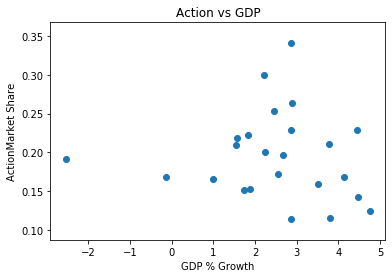

In [5]:
action = data['Action Market Share']
ac = np.zeros(24)
count = 0
for x in action:
    ac[count] = x
    count+=1
plt.scatter(g,ac)
plt.title('Action vs GDP')
plt.ylabel('ActionMarket Share')
plt.xlabel('GDP % Growth')
plt.show()

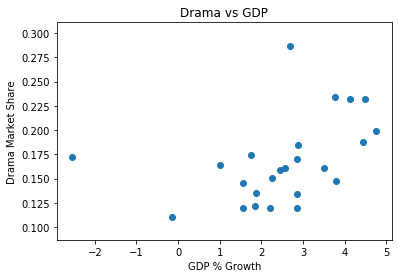

In [6]:
drama = data['Drama Market Share']
d = np.zeros(24)
count = 0
for x in drama:
    d[count] = x
    count+=1
plt.scatter(g,d)
plt.title('Drama vs GDP')
plt.ylabel('Drama Market Share')
plt.xlabel('GDP % Growth')
plt.show()

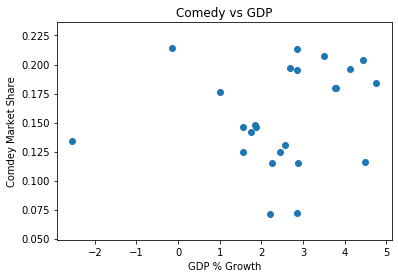

In [7]:
comedy = data['Comedy Market Share']
c = np.zeros(24)
count = 0
for x in comedy:
    c[count] = x
    count+=1
plt.scatter(g, c)
plt.title('Comedy vs GDP')
plt.ylabel('Comdey Market Share')
plt.xlabel('GDP % Growth')
plt.show()

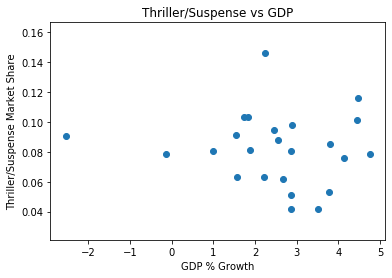

In [8]:
thriller = data['Thriller-or-Suspense Market Share']
t = np.zeros(24)
count = 0
for x in thriller:
    t[count] = x
    count+=1
plt.scatter(g,t)
plt.title('Thriller/Suspense vs GDP')
plt.ylabel('Thriller/Suspense Market Share')
plt.xlabel('GDP % Growth')
plt.show()

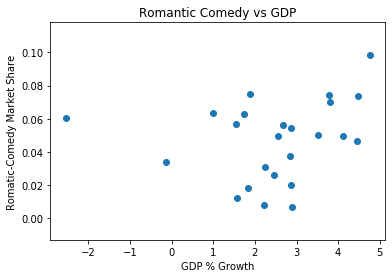

In [9]:
rom_com = data['Romantic-Comedy Market Share']
rc = np.zeros(24)
count = 0
for x in rom_com:
    rc[count] = x
    count+=1
plt.scatter(g, rc)
plt.title('Romantic Comedy vs GDP')
plt.ylabel('Romatic-Comedy Market Share')
plt.xlabel('GDP % Growth')
plt.show()

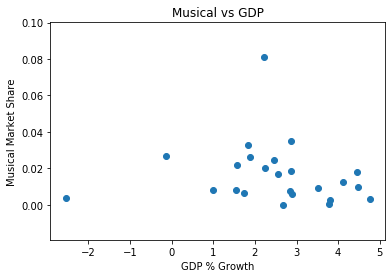

In [10]:
musical = data['Musical Market Share']
mu = np.zeros(24)
count = 0
for x in musical:
    mu[count] = x
    count+=1
plt.scatter(g, mu)
plt.title('Musical vs GDP')
plt.ylabel('Musical Market Share')
plt.xlabel('GDP % Growth')
plt.show()

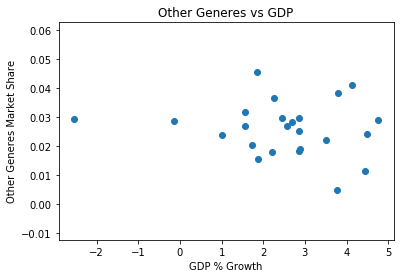

In [11]:
other = data['Other Genres Market Share']
o = np.zeros(24)
count = 0
for x in other:
    o[count] = x
    count+=1
plt.scatter(g, o)
plt.title('Other Generes vs GDP')
plt.ylabel('Other Generes Market Share')
plt.xlabel('GDP % Growth')
plt.show()

### Analysis of Plots
As you can see, all of the scatter plots show a few trends but are mainly hard to decipher because of inconsitent results. One point that is consistent is the one point in which GDP is below -2%. This outlier, although a much lower value when compared to the other gdps, may be a good way to visualize which generes do the best when the economy is doing the worst. With Romantic Comedy and Drama, one can see from the plots that there is somewhat a positive correlation between Market Share and GDP while with Adventure and Action, there seems to a negative correlation.

## Measuring the realationship between genre's Market Share with GDP by using linear regression coefficients

By running a singular regression of each genre's market share on GDP, we can determine the regression coefficient. This coefficient will predict the slope of the line of best fit when using GDP as the X axis and market share as Y axis. Basically each coefficient will predict the following: an increase of one percentage of GDP  will lead a "coefficient value" increse in that genre's market share. 

In [16]:
ad_model = LinearRegression().fit(data[['GDP % Growth']] ,data['Adventure Market Share'] )
ad_cor = ad_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(ad_cor), "change in Adventure Market Share")

ac_model = LinearRegression().fit(data[['GDP % Growth']],data['Action Market Share'], )
ac_coef= ac_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(ac_coef), "change in Action Market Share ")

d_model = LinearRegression().fit(data[['GDP % Growth']],data['Drama Market Share'] )
d_coef= d_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(d_coef), "change in Drama Market Share ")

c_model= LinearRegression().fit(data[['GDP % Growth']],data['Comedy Market Share'] )
c_coef= c_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(c_coef), "change in Comedy Market Share")

tr_model = LinearRegression().fit(data[['GDP % Growth']],data['Thriller-or-Suspense Market Share'] )
tr_coef= tr_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(tr_coef), "change in  Thriller/Suspense Market Share")

rc_model = LinearRegression().fit( data[['GDP % Growth']], data['Romantic-Comedy Market Share'])
rc_coef= rc_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(rc_coef), "change in Romantic-Comedy Market Share")

mu_model = LinearRegression().fit(data[['GDP % Growth']], data['Musical Market Share'] )
mu_coef= mu_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(mu_coef), "change in Musical Market Share")

o_model = LinearRegression().fit(data[['GDP % Growth']], data['Other Genres Market Share'])
o_coef= o_model.coef_[0]
print("A one percentage point increase in GDP leads to a {:.4f}".format(o_coef), "change in Other Genres Market Share")


A one percentage point increase in GDP leads to a -0.0138 change in Adventure Market Share
A one percentage point increase in GDP leads to a -0.0033 change in Action Market Share 
A one percentage point increase in GDP leads to a 0.0113 change in Drama Market Share 
A one percentage point increase in GDP leads to a 0.0047 change in Comedy Market Share
A one percentage point increase in GDP leads to a -0.0013 change in  Thriller/Suspense Market Share
A one percentage point increase in GDP leads to a 0.0032 change in Romantic-Comedy Market Share
A one percentage point increase in GDP leads to a -0.0012 change in Musical Market Share
A one percentage point increase in GDP leads to a -0.0008 change in Other Genres Market Share


### Analysis of coefficients
From the above values, a singular regression predicts that Adventure and Action have a negative slope/correlation to GDP and that Drama and Romantic-Comedy are predicted to have a positive slope/correlation to GDP. This is similar to what was predicted using the visuals of the scatter plots. However, the regressions also predicts that Comedy is postively correlated to GDP and that Thriller/Suspense, Musical, and other Genres are negatively correlated to GDP. These are values that are not so obvious when looking at the visuals.

## Measuring the relationship between Genre's Market Share with GDP using linear and possible non linear correlation values

Regression is not the only way and may not be the best way to show the possible correlation between two variables. Correlation Coefficient is a value that normalizes the covariance of two variables and shows the linear correlation they have (values between [-1,1]. A pearson correlation will use the ranks of values and measure the possible non-linear correlation between the two of them. IF there is a linear correlation, the two values should be similar and if there is more of a non linear correlation, the absolute value of the pearson correlation will be larger. 

In [17]:
ad_cor = np.corrcoef( data['GDP % Growth'],data['Adventure Market Share'])[0][1]
ad_sp = spearmanr(data['GDP % Growth'],data['Adventure Market Share'])
print("Correlation Coefficient between Adventure and GDP: {:.4f}".format(ad_cor))
print('Spearman r of Adventure and GDP: {:.4f}'.format(ad_sp.correlation))

ac_cor = np.corrcoef(data['GDP % Growth'],data['Action Market Share'])[0][1]
ac_sp = spearmanr(data['GDP % Growth'],data['Action Market Share'])
print("Correlation Coefficient between Action and GDP: {:.4f}".format(ac_cor))
print('Spearman r of Action and GDP: {:.4f}'.format(ac_sp.correlation))

d_cor = np.corrcoef(data['GDP % Growth'],data['Drama Market Share'])[0][1]
d_sp = spearmanr(data['GDP % Growth'],data['Drama Market Share'])
print("Correlation Coefficient between Drama and GDP: {:.4f}".format(d_cor))
print('Spearman r of Drama and GDP: {:.4f}'.format(d_sp.correlation))

c_cor = np.corrcoef(data['GDP % Growth'],data['Comedy Market Share'])[0][1]
c_sp = spearmanr(data['GDP % Growth'],data['Comedy Market Share'])
print("Correlation Coefficient between Comedy and GDP: {:.4f}".format(c_cor))
print('Spearman r of Comedy and GDP: {:.4f}'.format(c_sp.correlation))

tr_cor = np.corrcoef(data['GDP % Growth'],data['Thriller-or-Suspense Market Share'])[0][1]
tr_sp = spearmanr(data['GDP % Growth'],data['Thriller-or-Suspense Market Share'])
print("Correlation Coefficient between Thriller and GDP: {:.4f}".format(tr_cor))
print('Spearman r of Thriller and GDP: {:.4f}'.format(tr_sp.correlation))

rc_cor = np.corrcoef(data['GDP % Growth'], data['Romantic-Comedy Market Share'])[0][1]
rc_sp = spearmanr(data['GDP % Growth'],data['Romantic-Comedy Market Share'])
print("Correlation Coefficient between Romantic-Comedy and GDP: {:.4f}".format(rc_cor))
print('Spearman r of Romantic-Comedy and GDP: {:.4f}'.format(rc_sp.correlation))

mu_cor = np.corrcoef(data['GDP % Growth'],data['Musical Market Share'])[0][1]
mu_sp = spearmanr(data['GDP % Growth'],data['Musical Market Share'])
print("Correlation Coefficient between Musical and GDP: {:.4f}".format(mu_cor))
print('Spearman r of Musical and GDP: {:.4f}'.format(mu_sp.correlation))

o_cor = np.corrcoef(data['GDP % Growth'],data['Other Genres Market Share'])[0][1]
o_sp = spearmanr(data['GDP % Growth'],data['Other Genres Market Share'])
print("Correlation Coefficient between Other Genres and GDP: {:.4f}".format(o_cor))
print('Spearman r of Other Genresand GDP: {:.4f}'.format(o_sp.correlation))

Correlation Coefficient between Adventure and GDP: -0.4179
Spearman r of Adventure and GDP: -0.4905
Correlation Coefficient between Action and GDP: -0.0941
Spearman r of Action and GDP: -0.1257
Correlation Coefficient between Drama and GDP: 0.4085
Spearman r of Drama and GDP: 0.5224
Correlation Coefficient between Comedy and GDP: 0.1769
Spearman r of Comedy and GDP: 0.1967
Correlation Coefficient between Thriller and GDP: -0.0854
Spearman r of Thriller and GDP: -0.1409
Correlation Coefficient between Romantic-Comedy and GDP: 0.2144
Spearman r of Romantic-Comedy and GDP: 0.2130
Correlation Coefficient between Musical and GDP: -0.1147
Spearman r of Musical and GDP: -0.2857
Correlation Coefficient between Other Genres and GDP: -0.1465
Spearman r of Other Genresand GDP: -0.1235


### Analysis
From the correlation Coefficient and Spearman Correlation data, most of the genres have a more non-linear than linear realtionship with GDP. However, only two genres, Adventure and Drama, have an absolute value of spearman correlation higher than 0.5. This means that for a majority of the genres, although there there is more of a non-linear relationship than linear, there is little correlation between the two variables. This means that an increase or decrease in the market share of those genres does not lead to an increase or decrease in GDP. The change in GDP is more than likely randomly correlated to those genres and their relationship is mostly random. However, for Adventure and Drama there is more of an correlation which is non linear for both genres. The Spearman value is closer to an absolute value of 1 for both genres than their correlation coefficient values. This shows that there is a more non linear realtionship between the genres' market share and the GDP. As market share for Adventure increases, there is usually some sort of non linear decrease in GDP. As market share for Drama increases, there is usally some sort of non linear increase in GDP. This all boils down to this: Based off the correlations between Adventure and Drama with GDP, when the economy is doing well, Drama movies are made more and do better than usual. When the economy is doing poorly, Adventure movies are made more and do better than usual. 

## Testing the significance of the correlations and regression models

Using random permutations of each genere's market share, we can test to see if the correlations and coefficients genereated by regression models and spearman calculation actually show that, with a large number of samples, the certain genres and GDP are correlated. This will mainly be a test for the genres of Adventrue and Drama as they had much higher correlation values than all other genres. There seems to be little correlation for the other 6 genres so we will not test them. Also, we will use n = 1000 to ensure that there are enough random samples.

In [20]:
def permutated_y(x):
    return np.random.permutation(x.copy())

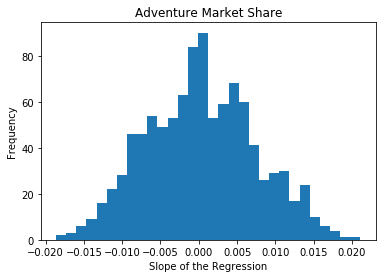

The mean of the permutated regressions is 0.000351
The variance of the permutated regressions is 0.000051


In [36]:
slope_ad = np.zeros(1000)
count = 0 
for x in slope_ad:
    p = permutated_y(data['Adventure Market Share'])
    c = LinearRegression().fit(data[['GDP % Growth']], p)
    num = c.coef_[0]
    slope_ad[count] = num
    count = count + 1
    
plt.hist(slope_ad, bins = 30)
plt.title("Adventure Market Share")
plt.xlabel("Slope of the Regression")
plt.ylabel("Frequency")
plt.show()
mean_ad = np.mean(slope_ad)
var_ad = np.var(slope_ad)
print("The mean of the permutated regressions is {:.6f}".format(mean_ad))
print("The variance of the permutated regressions is {:6f}".format(var_ad))

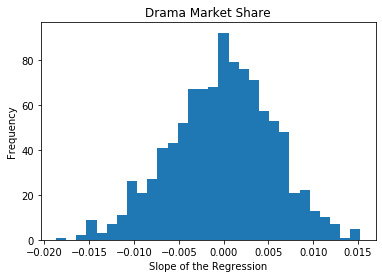

The mean of the permutated regressions is -0.000148
The variance of the permutated regressions is 0.000032


In [37]:
slope_d = np.zeros(1000)
count = 0 
for x in slope_d:
    p = permutated_y(data['Drama Market Share'])
    c = LinearRegression().fit(data[['GDP % Growth']], p)
    num = c.coef_[0]
    slope_d[count] = num
    count = count + 1
    
plt.hist(slope_d, bins = 30)
plt.title("Drama Market Share")
plt.xlabel("Slope of the Regression")
plt.ylabel("Frequency")
plt.show()
mean_d = np.mean(slope_d)
var_d = np.var(slope_d)
print("The mean of the permutated regressions is {:.6f}".format(mean_d))
print("The variance of the permutated regressions is {:.6f}".format(var_d))